# Qutip project 4

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *

## Introduction

In this notebook we're going to look for sub-harmonic resonances of a single spin. The sub-harmonic resonances are more pronounce when the driving field is strong enough. A spin is driven by a field that has both transversal and longitudinal components, $B(t)=(0, B \sin\theta, B \cos\theta)\cos\left( \omega_d t \right)$. The Hamiltonian of the system is 

$$ H = \left(\frac{\hbar}{2}\omega_0 + 2\hbar\Omega \cos\theta  \cos\left( \omega_d t \right) \right) \sigma_z + 2\hbar\Omega \sin\theta  \cos\left( \omega_d t \right) \sigma_x,$$

where $\omega_0$ is the systems transition frequency, $\sigma_i$ with $i=x,y,z$ is Pauli-matrix acting on the TLS system, $\omega_d$ is the driving frequency, and $\Omega(t)$ is half of the coherent driving strength. 



First we will study resonant frequencies in the situation that the driving field is purely transversal ($\theta=\pi/2$). Then we will find resonant frequencies for fields with equal transversal and longitudinal strength ($\theta=\pi/4$).


# Definition of the system

In [5]:
def qubit_integrate_labframe(omega_0, omega_d, rabi, theta,psi0, solver, phi = 0, g1 = 0, g2 = 0):

    H0 = (omega_0/2) * sigmaz()
    H1 = 2 * rabi * np.sin(theta) * sigmax()
    H2 = 2 * rabi * np.cos(theta) * sigmaz()
    
    def H1_coeff(t, args):
        return np.cos(omega_d*t+phi)
        
    def H2_coeff(t, args):
        return np.cos(omega_d*t+phi)
    
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
    
    H = [H0, [H1,H1_coeff],  [H2,H2_coeff]]
    
    if solver == "me": # master equation
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "es": # exact schrodinger
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc": # monte carlo
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, e_ops)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2] # Time-dependent expectation values of the qubit’s Pauli operators

# Transversal Field

Here we will find the resonant frequencies in the situation that the driving field is purely transversal ($\theta=\pi/2$). 

An example of the third harmonic with the driving strength rabi=$0.05\pi$ is shown in the next cell. The green curve is at the resonance which has the oscillation amplitude roughly equal to 1. The resonance frequency is roughly  $\omega_d=0.3371\pi$.

The resonant frequency depends on driving strength. Demonstrate this with the following steps:
* Change the driving strength to rabi=$0.10\pi$. 
* Try to find the resonance frequecy $\omega_d$ such that the oscillation has minimal value smaller than -0.95. 
* Plot the curves.


c:\Users\myria\AppData\Local\Programs\Python\Python314\Lib\site-packages\qutip\solver\solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


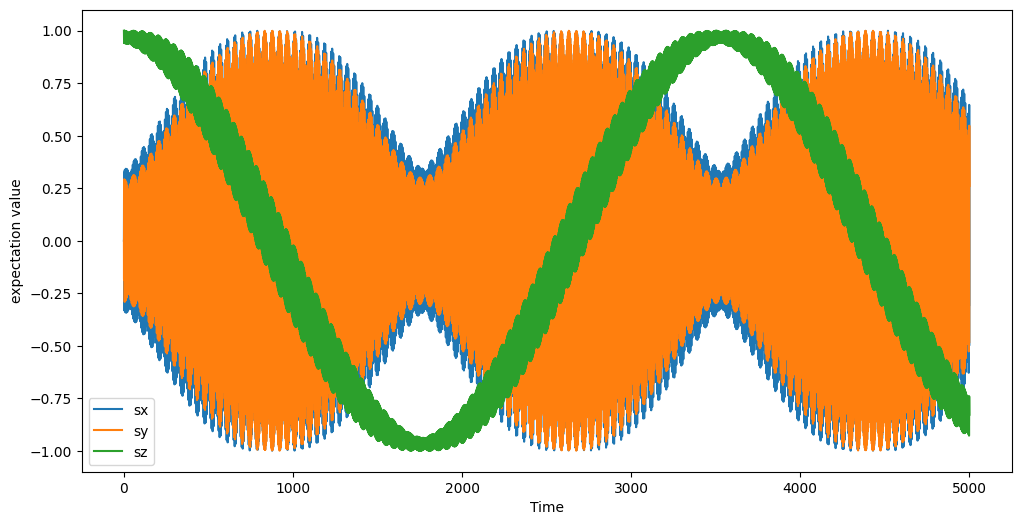

In [ ]:
rabi   = 0.05 * np.pi   # drive amplitude, how strongly the spin is driven
omega_d = 1.0 * np.pi * 0.3371   # drive frequency
## only change the code above this line

omega_0 = 1.0 * np.pi   # resonance frequency
theta = 0.5 * np.pi
g2 = 0.0 # noise
g1 = 0.0

# initial state
psi0 = basis(2,0)

tlist = np.linspace(0,5000,10000)

sx, sy, sz = qubit_integrate_labframe(omega_0, omega_d, rabi, theta, psi0,"me", g1, g2)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx), label=r"$\langle \sigma_x \rangle$")
ax.plot(tlist, np.real(sy), label=r"$\langle \sigma_y \rangle$")
ax.plot(tlist, np.real(sz), label=r"$\langle \sigma_z \rangle$")

ax.set_xlabel('Time')
ax.set_ylabel('Expectation value')
ax.legend()




# Non-transversal field

Find the second harmonic as well as the third harmonic resonance in the following cases where longitudinal driving field is non-zero.
Show that these depend on the inclination of the driving field by trying the following configurations:
* set theta=0.45$\pi$ and the driving strength rabi = $\frac{0.05 \pi}{sin(0.45\pi)}$.
* set theta=0.40$\pi$ and the driving strength rabi = $\frac{0.05 \pi}{sin(0.40\pi)}$.
* set theta=0.49$\pi$ and the driving strength rabi = $\frac{0.05 \pi}{sin(0.49\pi)}$.

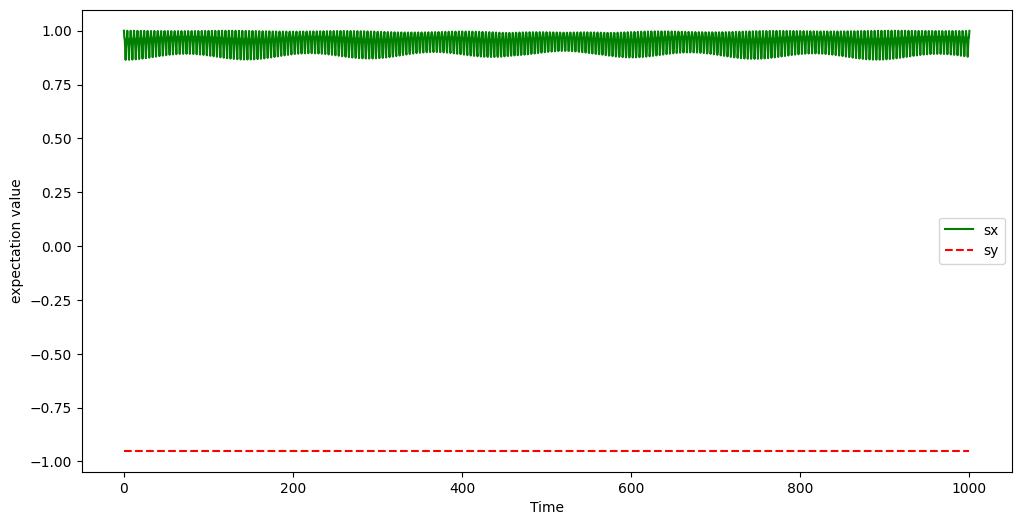

In [7]:
theta = 0.45*np.pi  
rabi   = 0.05 * np.pi/np.sin(theta)   # drive amplitude
omega_d = 1.0 * np.pi * 0.5   # drive frequency

omega_0 = 1.0 * np.pi   # resonance frequency
  
g2 = 0.0
g1 = 0.0

# intial state
psi0 = basis(2,0)

tlist = np.linspace(0,1000,2000) # time list

_, _, sz_brwa_d = qubit_integrate_labframe(omega_0, omega_d, rabi, theta, psi0,"me", g1, g2)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sz_brwa_d), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');




In [8]:
print(sz_brwa_d)

[1.         0.96796528 0.95751521 ... 0.96074032 0.9668559  0.99917527]
